### Installation the required libraries

In [ ]:
!pip install transformers diffusers accelerate -q

     |████████████████████████████████| 5.5 MB 5.2 MB/s 
     |████████████████████████████████| 304 kB 54.4 MB/s 
     |████████████████████████████████| 175 kB 72.8 MB/s 
     |████████████████████████████████| 7.6 MB 48.3 MB/s 
     |████████████████████████████████| 163 kB 69.4 MB/s 


### Load the StableDiffusion Pipeline to use for Image Generation

In [451]:
from diffusers import StableDiffusionPipeline
import torch

### Define the Model Path - https://huggingface.co/prompthero/midjourney-v4-diffusion

In [ ]:
model_path = 'prompthero/midjourney-v4-diffusion'

Start Downloading the Fine-tuned Model (Took about 7 mins)

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained(model_path , torch_dtype=torch.float16)

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.84k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/284 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/492M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/806 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/743 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/547 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


### Move the Models to GPU if GPU is available 

In [ ]:
!nvidia-smi

Fri Nov 11 23:01:38 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0    27W /  70W |   8816MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
torch.cuda.memory_summary(device=None, abbreviated=False)


'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 5            |        cudaMalloc retries: 5         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |    2994 MB |   12336 MB |    2549 GB |    2546 GB |\n|       from large pool |    2917 MB |   12260 MB |    2543 GB |    2540 GB |\n|       from small pool |      76 MB |      87 MB |       5 GB |       5 GB |\n|---------------------------------------------------------------------------|\n| Active memory         |    2994 MB |   12336 MB |    2549 GB |    2546 GB |\n|       from large pool |    2917 MB |   12260 MB |

In [ ]:
if torch.cuda.is_available():
  pipe = pipe.to("cuda")

device = "GPU 🔥" if torch.cuda.memory_summary(device=None, abbreviated=False) else "CPU 🥶"

In [ ]:
device

'GPU 🔥'

### Prompt

In [498]:
base_prompt = "75mm photo of a fire sculpture of a Laughing Leo, Laughing Leo made of flame, wirefire sculpture"  #@param {type:"string"}

In [499]:
#base_prompt = 'Close-up Portrait of a cyborg geisha, a glossy white, black, red, ivory porcelain face, mechanical features, cybernetic eyes, baroque, rococo, anodized titanium highly detailed mechanisms, gears, fiber, cogs, bulbs, wires, cables, 70mm, Canon EOS 6D Mark II, 4k, 35mm (FX, Full-Frame), f/2.5, extremely detailed, very high details, photorealistic, hi res, hdr, UHD, hyper-detailed, ultra-realistic, vibrant, centered, vivid colors, Wide angle, zoom out'

In [500]:
prompt = "mdjrny-v4 style " + base_prompt

In [501]:
prompt

'mdjrny-v4 style 75mm photo of a fire sculpture of a Laughing Leo, Laughing Leo made of flame, wirefire sculpture'

  0%|          | 0/51 [00:00<?, ?it/s]

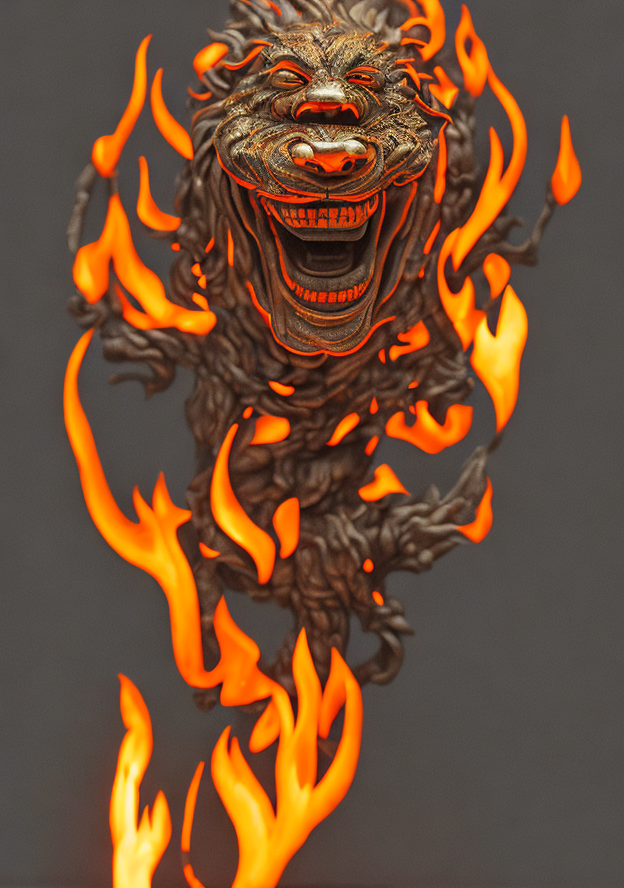

In [502]:
#@title Default title text
result = pipe(
      prompt,  
      width = 624,
      height = 888)

image = result.images[0]  
image.save("sd_img.png")
image

  0%|          | 0/51 [00:00<?, ?it/s]

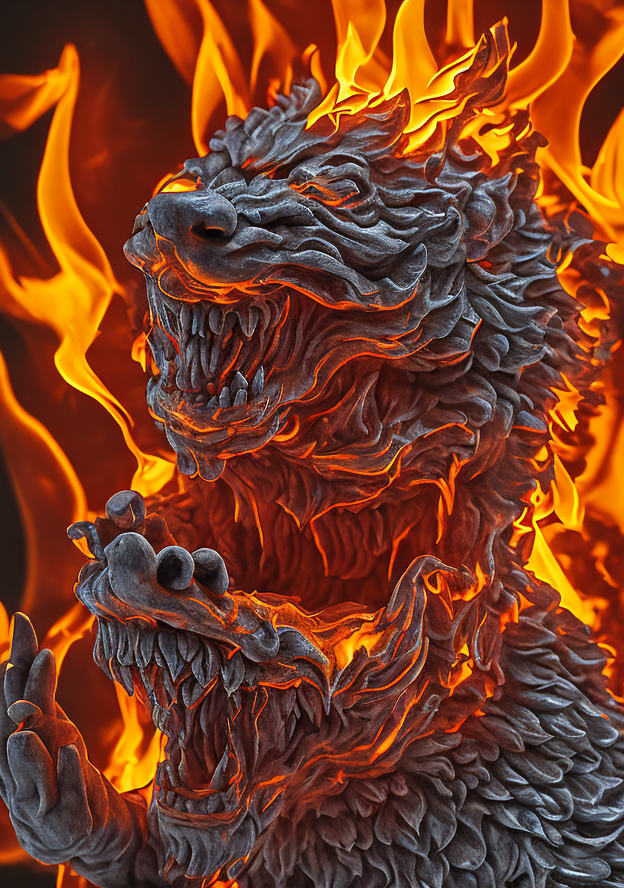

In [503]:
#@title Default title text
result1 = pipe(
      prompt,  
      width = 624,
      height = 888)

image = result1.images[0]  
image.save("sd_img1.png")
image

  0%|          | 0/51 [00:00<?, ?it/s]

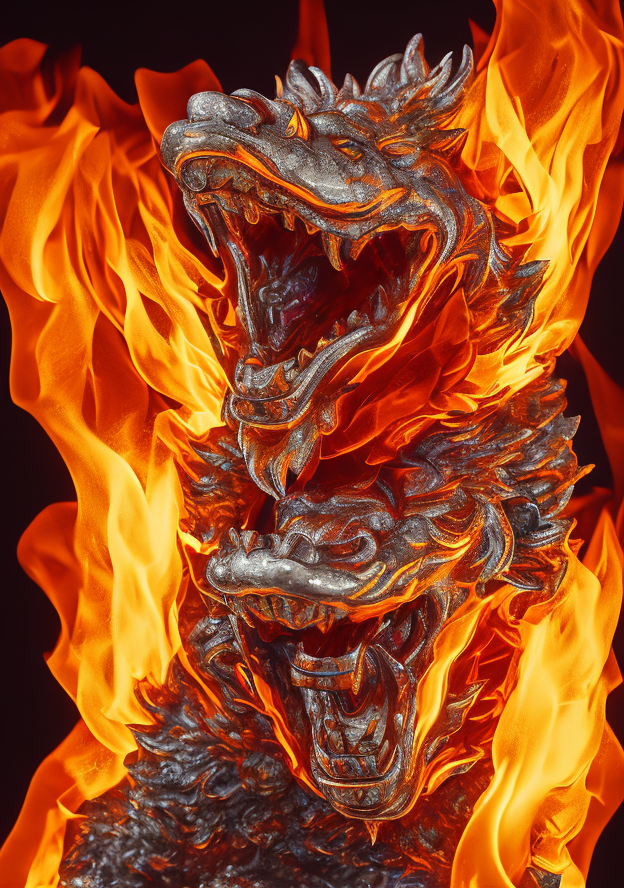

In [504]:
#@title Default title text
result2 = pipe(
      prompt,  
      width = 624,
      height = 888)

image = result2.images[0]  
image.save("sd_img2.png")
image

  0%|          | 0/51 [00:00<?, ?it/s]

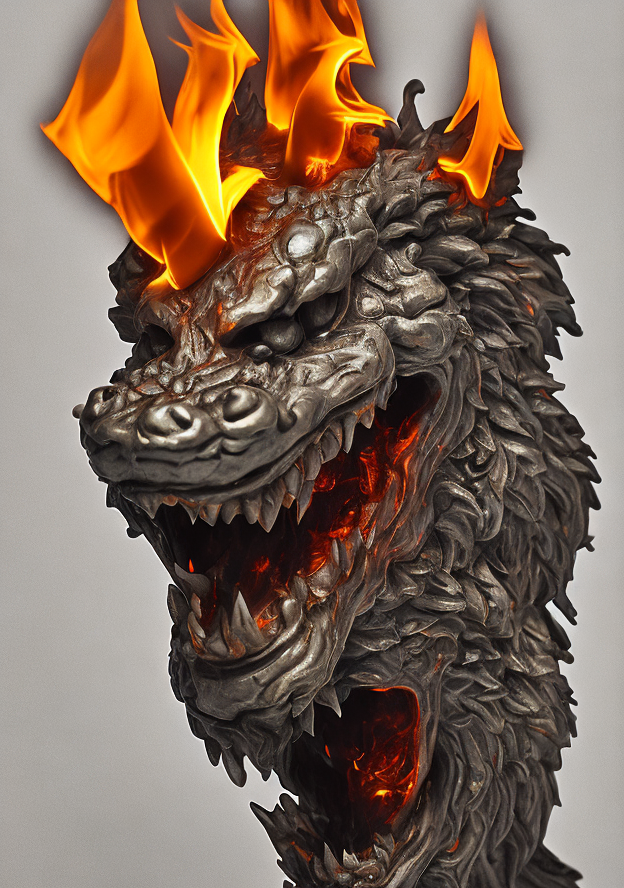

In [505]:
#@title Default title text
result3 = pipe(
      prompt,  
      width = 624,
      height = 888)

image = result3.images[0]  
image.save("sd_img3.png")
image